<a href="https://colab.research.google.com/github/nurfnick/Operations_Research/blob/main/Project_Assignments/LPAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming Assignment

## Redo a WeBWorK Question Using Python

Consider WW Set 03 Problem 3.  Using python, do the following:
1. Copy your problem here.
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function $P = 3x+2y$.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest 𝑥-value. If more than one vertex has the same, smallest 𝑥-value, start with the one that has the smallest 𝑦-value. Proceed clockwise from the first vertex. Leave any unnecessary answer spaces blank.

𝑥+𝑦≤6  
7𝑥+𝑦≥7  
𝑥≥0  
𝑦≥0  

In [2]:
from sympy import symbols, Eq, solve

x, y = symbols('x y', real=True)

# Define the boundary equations (equalities from inequalities)
eq1 = Eq(x + y, 6)
eq2 = Eq(7*x + y, 7)
eq3 = Eq(x, 0)
eq4 = Eq(y, 0)

eqs = [eq1, eq2, eq3, eq4]

# Empty list for intersection points
points = []

# Check all equation pairs to solve
for i in range(len(eqs)):
    for j in range(i + 1, len(eqs)):
        sol = solve((eqs[i], eqs[j]), (x, y))
        if sol:
            points.append((float(sol[x]), float(sol[y])))

# Filter points that satisfy all inequalities
feasible = []
for px, py in points:
    if (px + py <= 6) and (px >= 0) and (py >= 0) and (7*px + py >= 7):
        feasible.append((px, py))

# Remove duplicates (optional)
feasible = list(set(feasible))

print("Corner points:", feasible)


Corner points: [(1.0, 0.0), (0.16666666666666666, 5.833333333333333), (6.0, 0.0)]


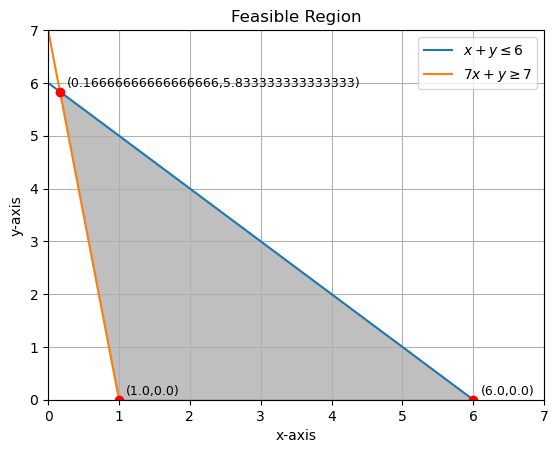

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of x-values
x = np.linspace(0, 8, 400)

# Define the inequalities as lines
# y <= 6 - x
y1 = 6 - x
# y >= 7 - 7x
y2 = 7 - 7*x

# Plot the lines
plt.plot(x, y1, label=r'$x+y \leq 6$')
plt.plot(x, y2, label=r'$7x+y \geq 7$')
plt.axhline(0, color='gray', lw=0.5) # y >= 0
plt.axvline(0, color='gray', lw=0.5) # x >= 0

# Define the lower and upper bounds for the shaded region
# The lower bound is the maximum of y=0 and y=7-7x
y_lower = np.maximum(y2, 0)
# The upper bound is y=6-x
y_upper = y1

# Shade the feasible region
plt.fill_between(x, y_lower, y_upper, where=(y_upper > y_lower), color='grey', alpha=0.5, interpolate=True)


# Corner points (from earlier calculation)
corner_points = feasible
for px, py in corner_points:
    plt.plot(px, py, 'ro')
    plt.text(px+0.1, py+0.1, f'({px},{py})', fontsize=9)

# Add labels, title, and legend
plt.title('Feasible Region')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.grid(True)
plt.legend()
plt.show()


In [11]:
# The objective function to maximize
def objective_function(x, y):
    return 3*x + 2*y

# Variables to store the best result
max_p = -1
max_corner = None

# Loop through each corner and evaluate the function
for x, y in feasible:
    p_value = objective_function(x, y)
    print(f"Testing corner ({x:.2f}, {y:.2f}): P = {p_value:.2f}")

    if p_value > max_p:
        max_p = p_value
        max_corner = (x, y)

# Print the final result
print("\n--- Result ---")
print(f"The function P = 3x + 2y is maximized at the corner {max_corner}.")
print(f"The maximum value is {max_p:.2f}.")

Testing corner (1.00, 0.00): P = 3.00
Testing corner (0.17, 5.83): P = 12.17
Testing corner (6.00, 0.00): P = 18.00

--- Result ---
The function P = 3x + 2y is maximized at the corner (6.0, 0.0).
The maximum value is 18.00.


In [9]:
import numpy as np
from itertools import combinations

# Coefficients for our variables [x, y, s1, s2]
# Eq1: 1x + 1y + 1s1 + 0s2 = 6
# Eq2: 7x + 1y + 0s1 - 1s2 = 7
coeffs = np.array([
    [1, 1, 1, 0],
    [7, 1, 0, -1]
])
# Right-hand side constants
constants = np.array([6, 7])

# All possible pairs of variables to set to zero
variable_indices = range(4)
non_basic_combinations = combinations(variable_indices, 2)

feasible_corners = set()

print("--- Testing Combinations ---")
for non_basic_indices in non_basic_combinations:
    try:
        # The variables we are solving for
        basic_indices = [i for i in variable_indices if i not in non_basic_indices]

        # Create the 2x2 matrix for the variables we're solving for
        A = coeffs[:, basic_indices]
        
        # Solve the system Ax = b
        solution = np.linalg.solve(A, constants)

        # Check for feasibility (all resulting values must be >= 0)
        if np.all(solution >= -1e-9): # Use tolerance for float errors
            full_solution = np.zeros(4)
            full_solution[basic_indices] = solution
            
            x, y = full_solution[0], full_solution[1]
            print(f"Feasible solution found: x={x:.2f}, y={y:.2f}, s1={full_solution[2]:.2f}, s2={full_solution[3]:.2f}")
            
            # Add the (x,y) corner point to a set to store unique points
            feasible_corners.add((round(x, 6), round(y, 6)))

    except np.linalg.LinAlgError:
        # This combination of variables cannot form a unique solution.
        pass

print("\n--- Feasible Corner Points (x, y) ---")

for corner in sorted(list(feasible_corners)):
    print(corner)

--- Testing Combinations ---
Feasible solution found: x=6.00, y=0.00, s1=0.00, s2=35.00
Feasible solution found: x=1.00, y=0.00, s1=5.00, s2=0.00
Feasible solution found: x=0.17, y=5.83, s1=0.00, s2=0.00

--- Feasible Corner Points (x, y) ---
(0.166667, 5.833333)
(1.0, 0.0)
(6.0, 0.0)


In [10]:
import numpy as np
from scipy.optimize import linprog

c = np.array([-3, -2])
A_ub = np.array([[1, 1], [-7, -1]]) # [x+y<=6], [-7x-y<=-7]
b_ub = np.array([6, -7])
bounds = [(0, None), (0, None)]

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if result.success:
    optimal_x, optimal_y = result.x
    max_p_value = -result.fun
    
    # The values of the slack variables are in result.slack
    slack_values = result.slack

    print(f"Optimal corner: (x={optimal_x:.2f}, y={optimal_y:.2f})")
    print(f"Maximum P value: {max_p_value:.2f}\n")
    
    print("--- Slack Variable Values ---")
    print(f"Slack for constraint 'x + y <= 6': {slack_values[0]:.2f}")
    print(f"Surplus for constraint '7x + y >= 7': {slack_values[1]:.2f}")
    print("\nSince the first slack is 0, the point (6,0) is ON the line x+y=6.")

Optimal corner: (x=6.00, y=0.00)
Maximum P value: 18.00

--- Slack Variable Values ---
Slack for constraint 'x + y <= 6': 0.00
Surplus for constraint '7x + y >= 7': 35.00

Since the first slack is 0, the point (6,0) is ON the line x+y=6.


## Redo a WeBWorK Question Using Python

Consider WW Set 04 Problem 6.  Using python, do the following:
1. Write the equations that describe the problem completely using $\LaTeX$ encoding.   
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

$\text{Objective Function} \quad P = 342x + 190y$ 
  
$\text{Constraints}$  
$22x + 11y \leq 748$  
$60x + 50y \leq 2560$  
$x \geq 0$  
$y \geq 0$

$x \text{ is the number of deluxe models, } y \text{ is the number of standard models}$

In [16]:
from sympy import symbols, Eq, solve

x, y = symbols('x y', real=True)

# Define the boundary equations (equalities from inequalities)
eq1 = Eq(22*x + 11*y, 748)
eq2 = Eq(60*x + 50*y, 2560)
eq3 = Eq(x, 0)
eq4 = Eq(y, 0)

eqs = [eq1, eq2, eq3, eq4]

# Empty list for intersection points
points = []

# Check all equation pairs to solve
for i in range(len(eqs)):
    for j in range(i + 1, len(eqs)):
        sol = solve((eqs[i], eqs[j]), (x, y))
        if sol:
            points.append((float(sol[x]), float(sol[y])))

# Filter points that satisfy all inequalities
feasible = []
for px, py in points:
    if (22*px + 11*py <= 748) and (px >= 0) and (py >= 0) and (60*px + 50*py <= 2560):
        feasible.append((px, py))

# Remove duplicates (optional)
feasible = list(set(feasible))

print("Corner points:", feasible)

Corner points: [(0.0, 51.2), (21.0, 26.0), (34.0, 0.0), (0.0, 0.0)]


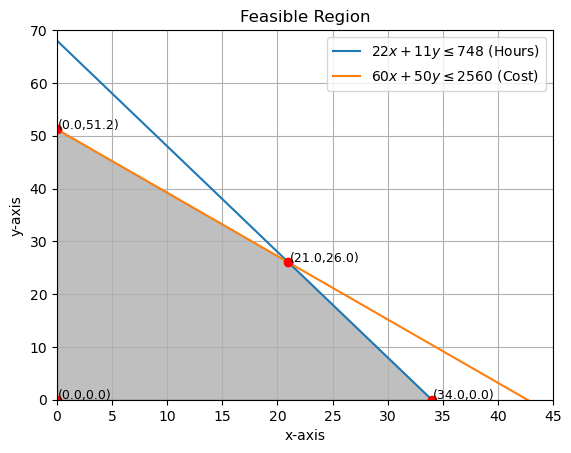

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of x-values
x = np.linspace(0, 50, 400)

# Define the inequalities as lines
y1 = (748 - 22*x)/11
y2 = (2560 - 60*x)/50

# Plot the lines
plt.plot(x, y1, label=r'$22x+11y \leq 748$ (Hours)')
plt.plot(x, y2, label=r'$60x+50y \leq 2560$ (Cost)')
plt.axhline(0, color='gray', lw=0.5) # y >= 0
plt.axvline(0, color='gray', lw=0.5) # x >= 0

# Define the lower and upper bounds for the shaded region
# upper bound is the minium of both since both eqs are lower than
y_upper = np.minimum(y1, y2)
# The lower band is the x axis
y_lower = np.zeros_like(x)

# Shade the feasible region
plt.fill_between(x, y_lower, y_upper, where=(y_upper > y_lower), color='grey', alpha=0.5, interpolate=True)


# Corner points (from earlier calculation)
corner_points = feasible
for px, py in corner_points:
    plt.plot(px, py, 'ro')
    plt.text(px+0.1, py+0.1, f'({px},{py})', fontsize=9)

# Add labels, title, and legend
plt.title('Feasible Region')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.xlim(0, 45)
plt.ylim(0, 70)
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# The objective function to maximize
def objective_function(x, y):
    return 342*x + 190*y

# Variables to store the best result
max_p = -1
max_corner = None

# Loop through each corner and evaluate the function
for x, y in feasible:
    p_value = objective_function(x, y)
    print(f"Testing corner ({x:.2f}, {y:.2f}): P = {p_value:.2f}")

    if p_value > max_p:
        max_p = p_value
        max_corner = (x, y)

# Print the final result
print("\n--- Result ---")
print(f"The function P = 342x + 190y is maximized at the corner {max_corner}.")
print(f"The maximum value is {max_p:.2f}.")

Testing corner (0.00, 51.20): P = 9728.00
Testing corner (21.00, 26.00): P = 12122.00
Testing corner (34.00, 0.00): P = 11628.00
Testing corner (0.00, 0.00): P = 0.00

--- Result ---
The function P = 3x + 2y is maximized at the corner (21.0, 26.0).
The maximum value is 12122.00.


In [20]:
import numpy as np
from itertools import combinations

# Coefficients for our variables [x, y, s1, s2]
# Eq1: 22x + 11y + 1s1 + 0s2 = 748
# Eq2: 60x + 50y + 0s1 + 1s2 = 2560
coeffs = np.array([
    [22, 11, 1, 0],
    [60, 50, 0, 1]
])
# Right-hand side constants
constants = np.array([748, 2560])

# All possible pairs of variables to set to zero
variable_indices = range(4)
non_basic_combinations = combinations(variable_indices, 2)

feasible_corners = set()

print("--- Testing Combinations ---")
for non_basic_indices in non_basic_combinations:
    try:
        # The variables we are solving for
        basic_indices = [i for i in variable_indices if i not in non_basic_indices]

        # Create the 2x2 matrix for the variables we're solving for
        A = coeffs[:, basic_indices]
        
        # Solve the system Ax = b
        solution = np.linalg.solve(A, constants)

        # Check for feasibility (all resulting values must be >= 0)
        if np.all(solution >= -1e-9): # Use tolerance for float errors
            full_solution = np.zeros(4)
            full_solution[basic_indices] = solution
            
            x, y = full_solution[0], full_solution[1]
            print(f"Feasible solution found: x={x:.2f}, y={y:.2f}, s1={full_solution[2]:.2f}, s2={full_solution[3]:.2f}")
            
            # Add the (x,y) corner point to a set to store unique points
            feasible_corners.add((round(x, 6), round(y, 6)))

    except np.linalg.LinAlgError:
        # This combination of variables cannot form a unique solution.
        pass

print("\n--- Feasible Corner Points (x, y) ---")

for corner in sorted(list(feasible_corners)):
    print(corner)

--- Testing Combinations ---
Feasible solution found: x=0.00, y=0.00, s1=748.00, s2=2560.00
Feasible solution found: x=0.00, y=51.20, s1=184.80, s2=0.00
Feasible solution found: x=34.00, y=0.00, s1=0.00, s2=520.00
Feasible solution found: x=21.00, y=26.00, s1=0.00, s2=0.00

--- Feasible Corner Points (x, y) ---
(0.0, 0.0)
(0.0, 51.2)
(21.0, 26.0)
(34.0, 0.0)


In [21]:
import numpy as np
from scipy.optimize import linprog

c = np.array([-342, -190])
A_ub = np.array([[22, 11], [60, 50]]) # [22x+11y<=748], [60x+50y<=2560]
b_ub = np.array([748, 2560])
bounds = [(0, None), (0, None)]

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

if result.success:
    optimal_x, optimal_y = result.x
    max_p_value = -result.fun
    
    # The values of the slack variables are in result.slack
    slack_values = result.slack

    print(f"Optimal corner: (x={optimal_x:.2f}, y={optimal_y:.2f})")
    print(f"Maximum P value: {max_p_value:.2f}\n")
    
    print("--- Slack Variable Values ---")
    print(f"Slack for constraint '22x + 11y <= 748': {slack_values[0]:.2f}")
    print(f"Surplus for constraint '60x + 50y >= 2560': {slack_values[1]:.2f}")
    print("\nSince the first slack is 0, the point (6,0) is ON the line x+y=6.")

Optimal corner: (x=21.00, y=26.00)
Maximum P value: 12122.00

--- Slack Variable Values ---
Slack for constraint '22x + 11y <= 748': 0.00
Surplus for constraint '60x + 50y >= 2560': 0.00

Since the first slack is 0, the point (6,0) is ON the line x+y=6.
